In [1]:
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pathlib import Path
from PIL import Image
import cv2
from tensorflow.keras import layers
from sklearn import preprocessing

In [2]:
! unzip /content/archive.zip -d /content/rice_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: /content/rice_dataset/Rice_Image_Dataset/Karacadag/Karacadag (5508).j

In [3]:
import os

print(os.listdir('/content/rice_dataset'))
print(os.listdir('/content/rice_dataset/Rice_Image_Dataset'))

['Rice_Image_Dataset']
['Basmati', 'Arborio', 'Ipsala', 'Karacadag', 'Rice_Citation_Request.txt', 'Jasmine']


In [4]:
images_path = '/content/rice_dataset/Rice_Image_Dataset'

In [5]:
from glob import glob

images = glob(os.path.join(images_path, '**', '*.jpg'), recursive=True)
print(f"Found {len(images)} images")

Found 75000 images


In [6]:
len(images)

75000

In [7]:
print(images[:5])

['/content/rice_dataset/Rice_Image_Dataset/Basmati/basmati (12108).jpg', '/content/rice_dataset/Rice_Image_Dataset/Basmati/basmati (10205).jpg', '/content/rice_dataset/Rice_Image_Dataset/Basmati/basmati (10167).jpg', '/content/rice_dataset/Rice_Image_Dataset/Basmati/basmati (12842).jpg', '/content/rice_dataset/Rice_Image_Dataset/Basmati/basmati (1207).jpg']


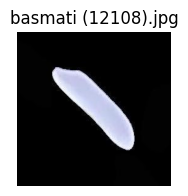

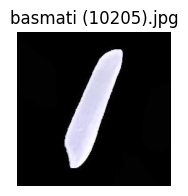

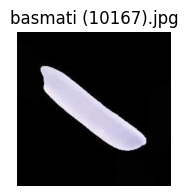

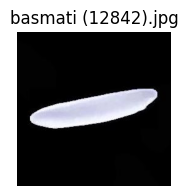

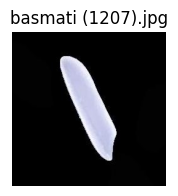

In [8]:
import matplotlib.pyplot as plt
import cv2

for i in range(5):
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(2, 2))
    plt.imshow(img)
    plt.title(os.path.basename(images[i]))
    plt.axis('off')
    plt.show()

In [11]:
from pathlib import Path
from sklearn import preprocessing

image_paths = list(Path('/content/rice_dataset/Rice_Image_Dataset').rglob('*.jpg'))


image_names = [p.parent.name for p in image_paths]


label_encoder = preprocessing.LabelEncoder()
image_labels = label_encoder.fit_transform(image_names)

In [12]:
import numpy as np
import pandas as pd


image_link = image_paths

df = pd.DataFrame()
df['link'] = np.array(image_link, dtype=str)
df['name'] = image_names
df['label'] = image_labels

print(df.head())

                                                link     name  label
0  /content/rice_dataset/Rice_Image_Dataset/Basma...  Basmati      1
1  /content/rice_dataset/Rice_Image_Dataset/Basma...  Basmati      1
2  /content/rice_dataset/Rice_Image_Dataset/Basma...  Basmati      1
3  /content/rice_dataset/Rice_Image_Dataset/Basma...  Basmati      1
4  /content/rice_dataset/Rice_Image_Dataset/Basma...  Basmati      1


In [13]:
df

,link,name,label
0,/content/rice_dataset/Rice_Image_Dataset/Basma...,Basmati,1
1,/content/rice_dataset/Rice_Image_Dataset/Basma...,Basmati,1
2,/content/rice_dataset/Rice_Image_Dataset/Basma...,Basmati,1
3,/content/rice_dataset/Rice_Image_Dataset/Basma...,Basmati,1
4,/content/rice_dataset/Rice_Image_Dataset/Basma...,Basmati,1
...,...,...,...
74995,/content/rice_dataset/Rice_Image_Dataset/Jasmi...,Jasmine,3
74996,/content/rice_dataset/Rice_Image_Dataset/Jasmi...,Jasmine,3
74997,/content/rice_dataset/Rice_Image_Dataset/Jasmi...,Jasmine,3
74998,/content/rice_dataset/Rice_Image_Dataset/Jasmi...,Jasmine,3


<Axes: xlabel='name'>

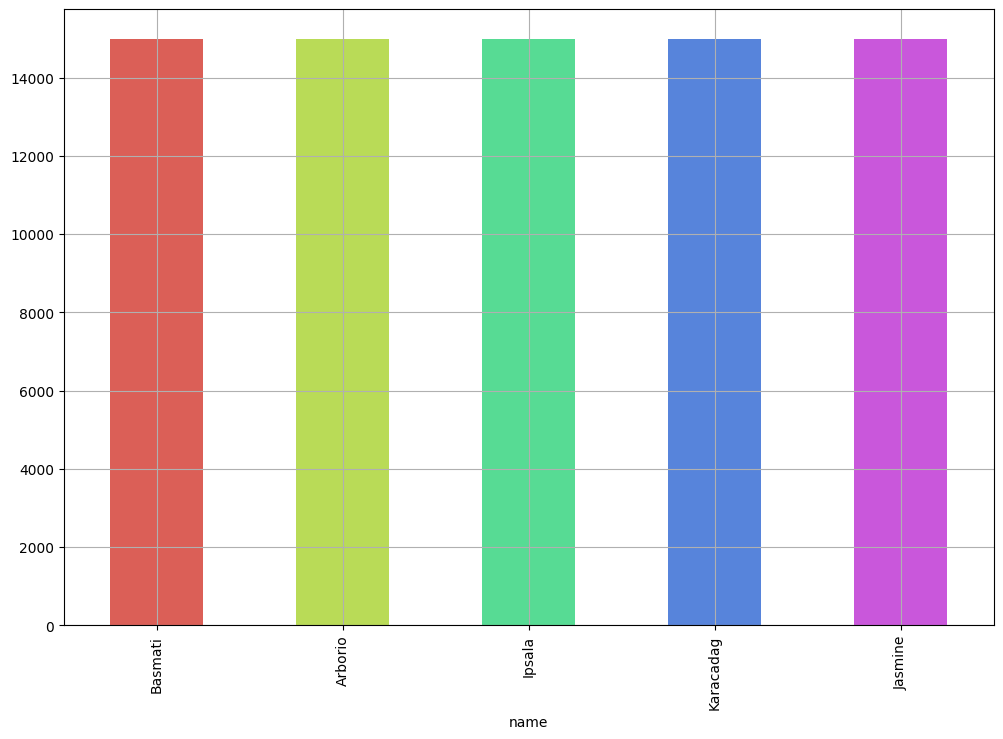

In [14]:
import seaborn as sns

df.name.value_counts().plot(kind='bar', figsize=(12, 8), grid=True, color=sns.color_palette('hls', df.name.nunique()))

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.3, random_state=1)

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential

In [17]:
train_images = ImageDataGenerator().flow_from_dataframe(
    dataframe = train_df,
    x_col = 'link',
    y_col = 'name',
    color_mode = 'rgb',
    batch_siz = 32,
    target_size=(28,28),
    clas_mode = 'categorical',
    subset = 'training'

)

test_images = ImageDataGenerator().flow_from_dataframe(
    dataframe = test_df,
    x_col = 'link',
    y_col = 'name',
    color_mode = 'rgb',
    batch_siz = 32,
    target_size=(28,28),
    clas_mode = 'categorical'
)

Found 52500 validated image filenames belonging to 5 classes.
Found 22500 validated image filenames belonging to 5 classes.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import pandas as pd


def load_images(df, img_size=(28, 28)):
    images = []
    for path in df['link']:
        img = load_img(path, target_size=img_size)
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

X_train = load_images(train_df)
X_test = load_images(test_df)

X_train = X_train / 255.0
X_test = X_test / 255.0


le = LabelEncoder()
y_train_encoded = le.fit_transform(train_df['name'])
y_test_encoded = le.transform(test_df['name'])

y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)


model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_onehot, epochs=3, batch_size=32, validation_data=(X_test, y_test_onehot))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 99s 59ms/step - accuracy: 0.8870 - loss: 0.2803 - val_accuracy: 0.9713 - val_loss: 0.0820
Epoch 2/3
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 95s 58ms/step - accuracy: 0.9716 - loss: 0.0828 - val_accuracy: 0.9754 - val_loss: 0.0697
Epoch 3/3
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 139s 56ms/step - accuracy: 0.9776 - loss: 0.0647 - val_accuracy: 0.9723 - val_loss: 0.0806


In [19]:
model.evaluate(test_images)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - accuracy: 0.9214 - loss: 44.6503


[44.03765106201172, 0.9220888614654541]

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 748,241 (2.85 MB)

 Trainable params: 249,413 (974.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 498,828 (1.90 MB)

In [22]:
from sklearn.metrics import classification_report


predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_df['label'].values

print(classification_report(true_labels, predicted_labels))

704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step
              precision    recall  f1-score   support

           0       0.19      0.17      0.18      4510
           1       0.20      0.25      0.22      4545
           2       0.20      0.21      0.21      4506
           3       0.20      0.14      0.17      4482
           4       0.20      0.20      0.20      4457

    accuracy                           0.20     22500
   macro avg       0.20      0.20      0.19     22500
weighted avg       0.20      0.20      0.19     22500



In [23]:
model.save("rice_cnn_model.h5")


from tensorflow.keras.models import load_model
model = load_model("rice_cnn_model.h5")